## Generate a signal

In [2]:
!pip install numpy
!pip install scipy
!pip install matplotlib

In [3]:
import numpy as np
import scipy.io.wavfile
import scipy.signal
import matplotlib.pyplot as plt

Create a class that stores the signal state

In [4]:
class signalGenerator:
    def __init__(self):
        # Audio will contain a long list of samples (i.e. floating point numbers describing the
        # waveform).  If you were working with a very long sound you'd want to stream this to
        # disk instead of buffering it all in memory list this.  But most sounds will fit in 
        # memory.
        self.audio = []
        self.sample_rate = 44100.0

    def append_silence(self, duration_milliseconds=500):

        num_samples = duration_milliseconds * (self.sample_rate / 1000.0)

        for x in range(int(num_samples)):
            self.audio.append(0.0)

        return

    def append_signalwave(
            self,
            freq=440.0,
            duration_milliseconds=500,
            volume=1.0):
  

        num_samples = duration_milliseconds * (self.sample_rate / 1000.0)

        x = np.array([i for i in range(int(num_samples))])

        signal_wave = volume * np.sin(2 * np.pi * freq * (x / self.sample_rate))

        # Generate hanning window of same length as the tone and apply it to the signal
        hanning_window = np.hanning(num_samples)
        signal_wave = np.multiply(hanning_window, signal_wave)

        self.audio.extend(list(signal_wave))
        return

    def append_signalwaves(
            self,
            freqs=[440.0],
            duration_milliseconds=500,
            volumes=[1.0]):
       

        volumes = list(np.array(volumes)/sum(volumes))
        num_samples = duration_milliseconds * (self.sample_rate / 1000.0)
        x = np.array([i for i in range(int(num_samples))])

        first_it = True
        for volume, freq in zip(volumes, freqs):
            print(freq)
            if first_it:
                signal_wave = volume * np.sin(2 * np.pi * freq * (x / self.sample_rate))
                first_it = False
            else:
                signal_wave += volume * np.sin(2 * np.pi * freq * (x / self.sample_rate))

        # Generate hanning window of same length as the tone and apply it to the signal
        hanning_window = np.hanning(num_samples)
        signal_wave = np.multiply(hanning_window, signal_wave)

        self.audio.extend(list(signal_wave))
        return

    def highpass(self, cutoff_freq):
        sos = scipy.signal.butter(10, cutoff_freq, 'hp', fs=self.sample_rate, output='sos')
        self.audio = scipy.signal.sosfilt(sos, self.audio)

    def save_wav(self, file_name):

        # 44100 is the industry standard sample rate - CD quality.  If you need to
        # save on file size you can adjust it downwards. The standard for low quality
        # is 8000 or 8kHz.

        # WAV files here are using short, 16 bit, signed integers for the 
        # sample size.  So we multiply the floating point data we have by 32767, the
        # maximum value for a short integer.  NOTE: It is theoretically possible to
        # use the floating point -1.0 to 1.0 data directly in a WAV file but not
        # obvious how to do that using the wave module in python.
        self.audio = np.array(self.audio).astype(np.float32)
        scipy.io.wavfile.write(file_name, int(self.sample_rate), np.array(self.audio))
        return

Now generate a signal and plot it

In [14]:
signal = signalGenerator()

signal.append_silence()
signal.append_signalwaves(volumes=[1, 0, 1, 0, 1], duration_milliseconds=500, freqs=[256.87, 384.87, 576.65, 864.00, 1294.54])
signal.append_silence()
# signal.highpass(20000) # band limited to ultrasonic tones
signal.save_wav("output.wav")

256.87
384.87
576.65
864.0
1294.54


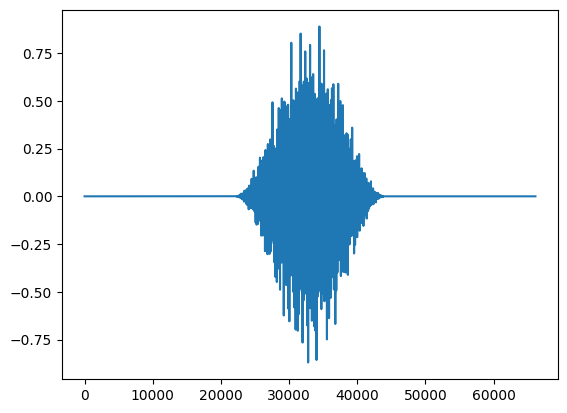

In [8]:
plt.plot(signal.audio)